<a href="https://colab.research.google.com/github/alexandrenriq/100DaysOfMLCode/blob/master/2.%20Exploratory%20Data%20Analysis/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Exploratory Data Analysis

In [0]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import seaborn as sns

In [0]:
pkmn_file = 'https://raw.githubusercontent.com/alexandrenriq/100DaysOfMLCode/master/2.%20Exploratory%20Data%20Analysis/Pokemon.csv'
pkmn_data = pd.read_csv(pkmn_file)

In [8]:
pkmn_data.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [9]:
pkmn_data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [10]:
pkmn_data.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [11]:
pkmn_data.shape

(800, 13)

In [0]:
pkmn_data['Legendary'] = pkmn_data['Legendary'].astype(np.number)

In [19]:
# numerical features
numeric_features = pkmn_data.select_dtypes(include=[np.number])
numeric_features.columns

Index(['#', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed',
       'Generation', 'Legendary'],
      dtype='object')

In [13]:
# categorical features
categ_features = pkmn_data.select_dtypes(include=[np.object])
categ_features.columns

Index(['Name', 'Type 1', 'Type 2'], dtype='object')

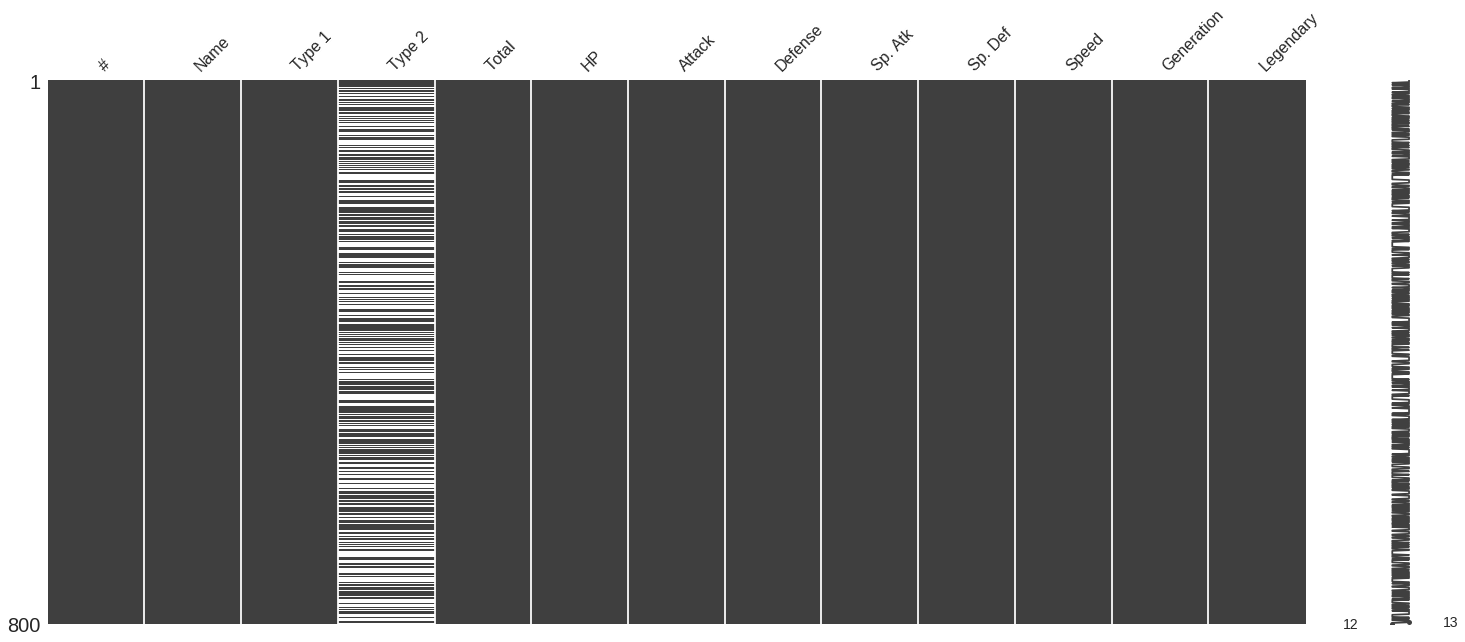

In [14]:
msno.matrix(pkmn_data.sample(800))

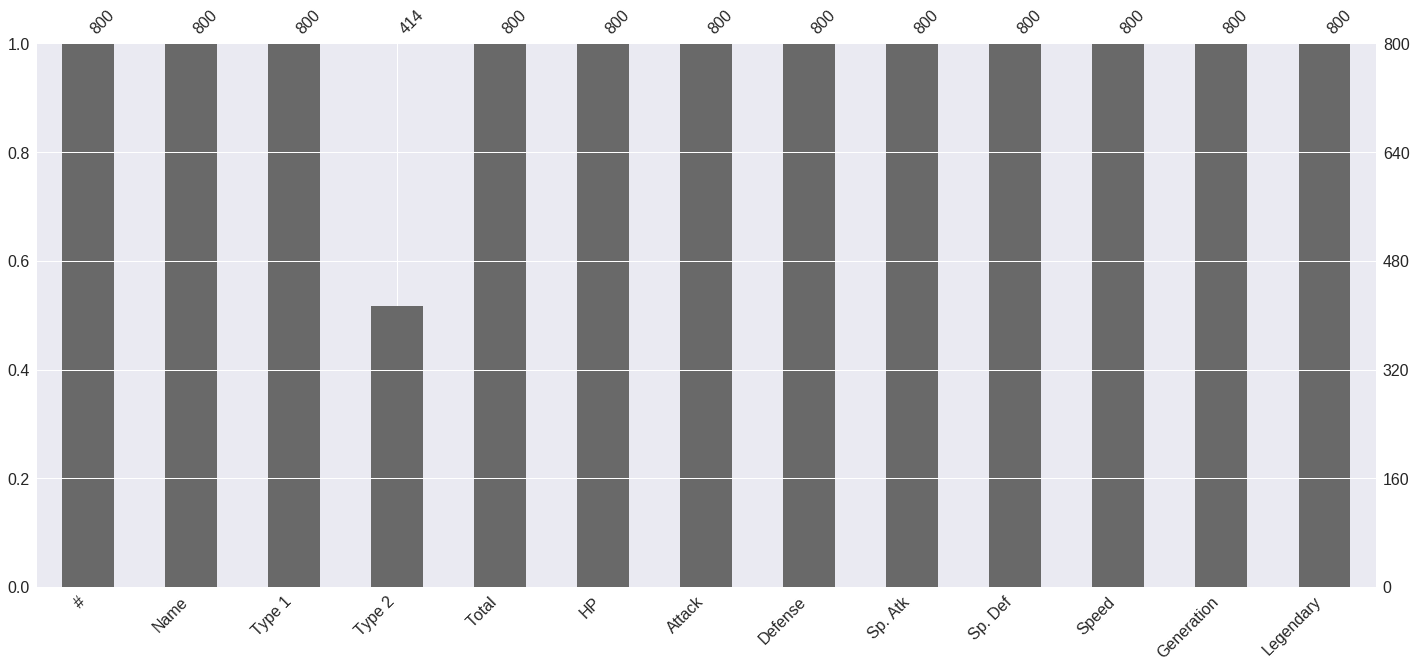

In [15]:
msno.bar(pkmn_data.sample(800))

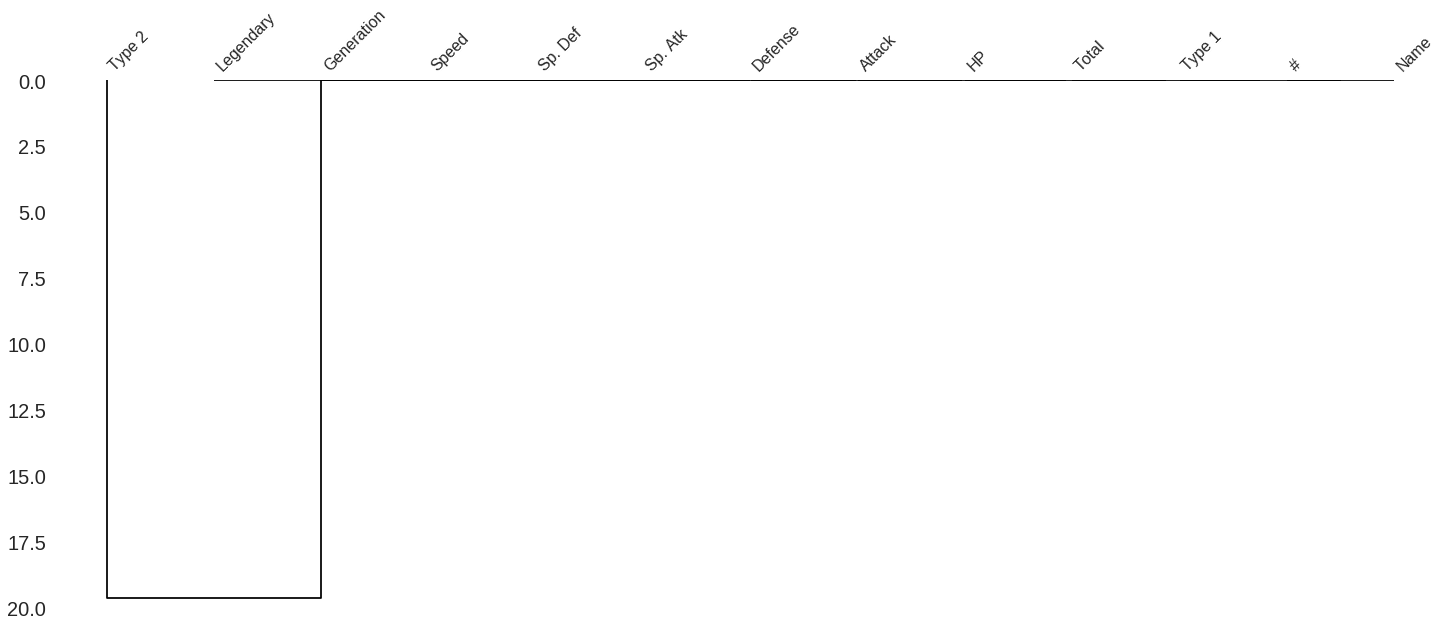

In [16]:
msno.dendrogram(pkmn_data)

In [17]:
pkmn_data.skew(), pkmn_data.kurt()

(#            -0.001123
 Total         0.152530
 HP            1.568224
 Attack        0.551614
 Defense       1.155912
 Sp. Atk       0.744662
 Sp. Def       0.854019
 Speed         0.357933
 Generation    0.014258
 Legendary     3.071072
 dtype: float64, #            -1.165705
 Total        -0.507461
 HP            7.232078
 Attack        0.169717
 Defense       2.726260
 Sp. Atk       0.297894
 Sp. Def       1.628394
 Speed        -0.236437
 Generation   -1.239576
 Legendary     7.450100
 dtype: float64)

In [20]:
correlation = numeric_features.corr()
print(correlation['Legendary'].sort_values(ascending=False), '\n')

Legendary     1.000000
Total         0.501758
Sp. Atk       0.448907
Sp. Def       0.363937
Attack        0.345408
Speed         0.326715
HP            0.273620
Defense       0.246377
#             0.153396
Generation    0.079794
Name: Legendary, dtype: float64 



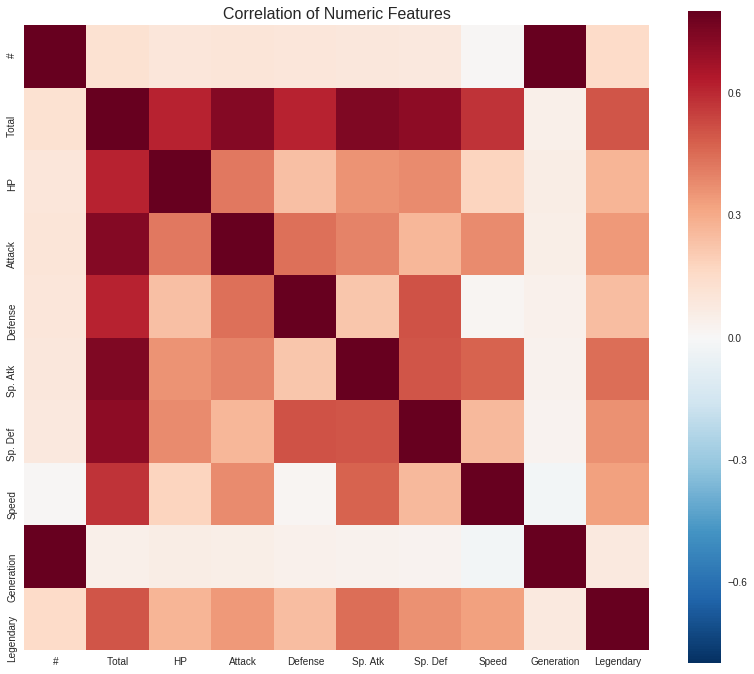

In [21]:
f , ax = plt.subplots(figsize = (14,12))

plt.title('Correlation of Numeric Features',y=1,size=16)

sns.heatmap(correlation,square = True,  vmax=0.8)

Index(['Legendary', 'Total', 'Sp. Atk', 'Sp. Def', 'Attack', 'Speed', 'HP',
       'Defense', '#', 'Generation'],
      dtype='object')


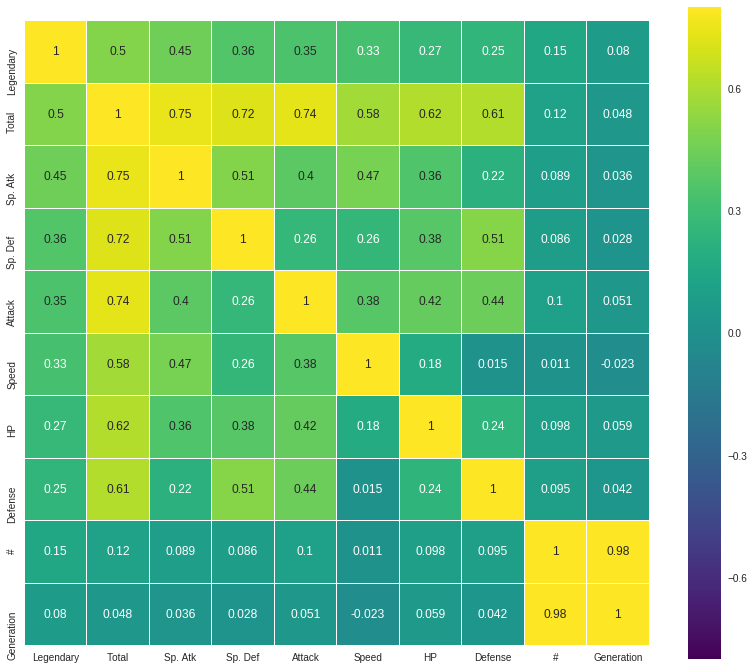

In [22]:
k= 11
cols = correlation.nlargest(k,'Legendary')['Legendary'].index
print(cols)
cm = np.corrcoef(pkmn_data[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)


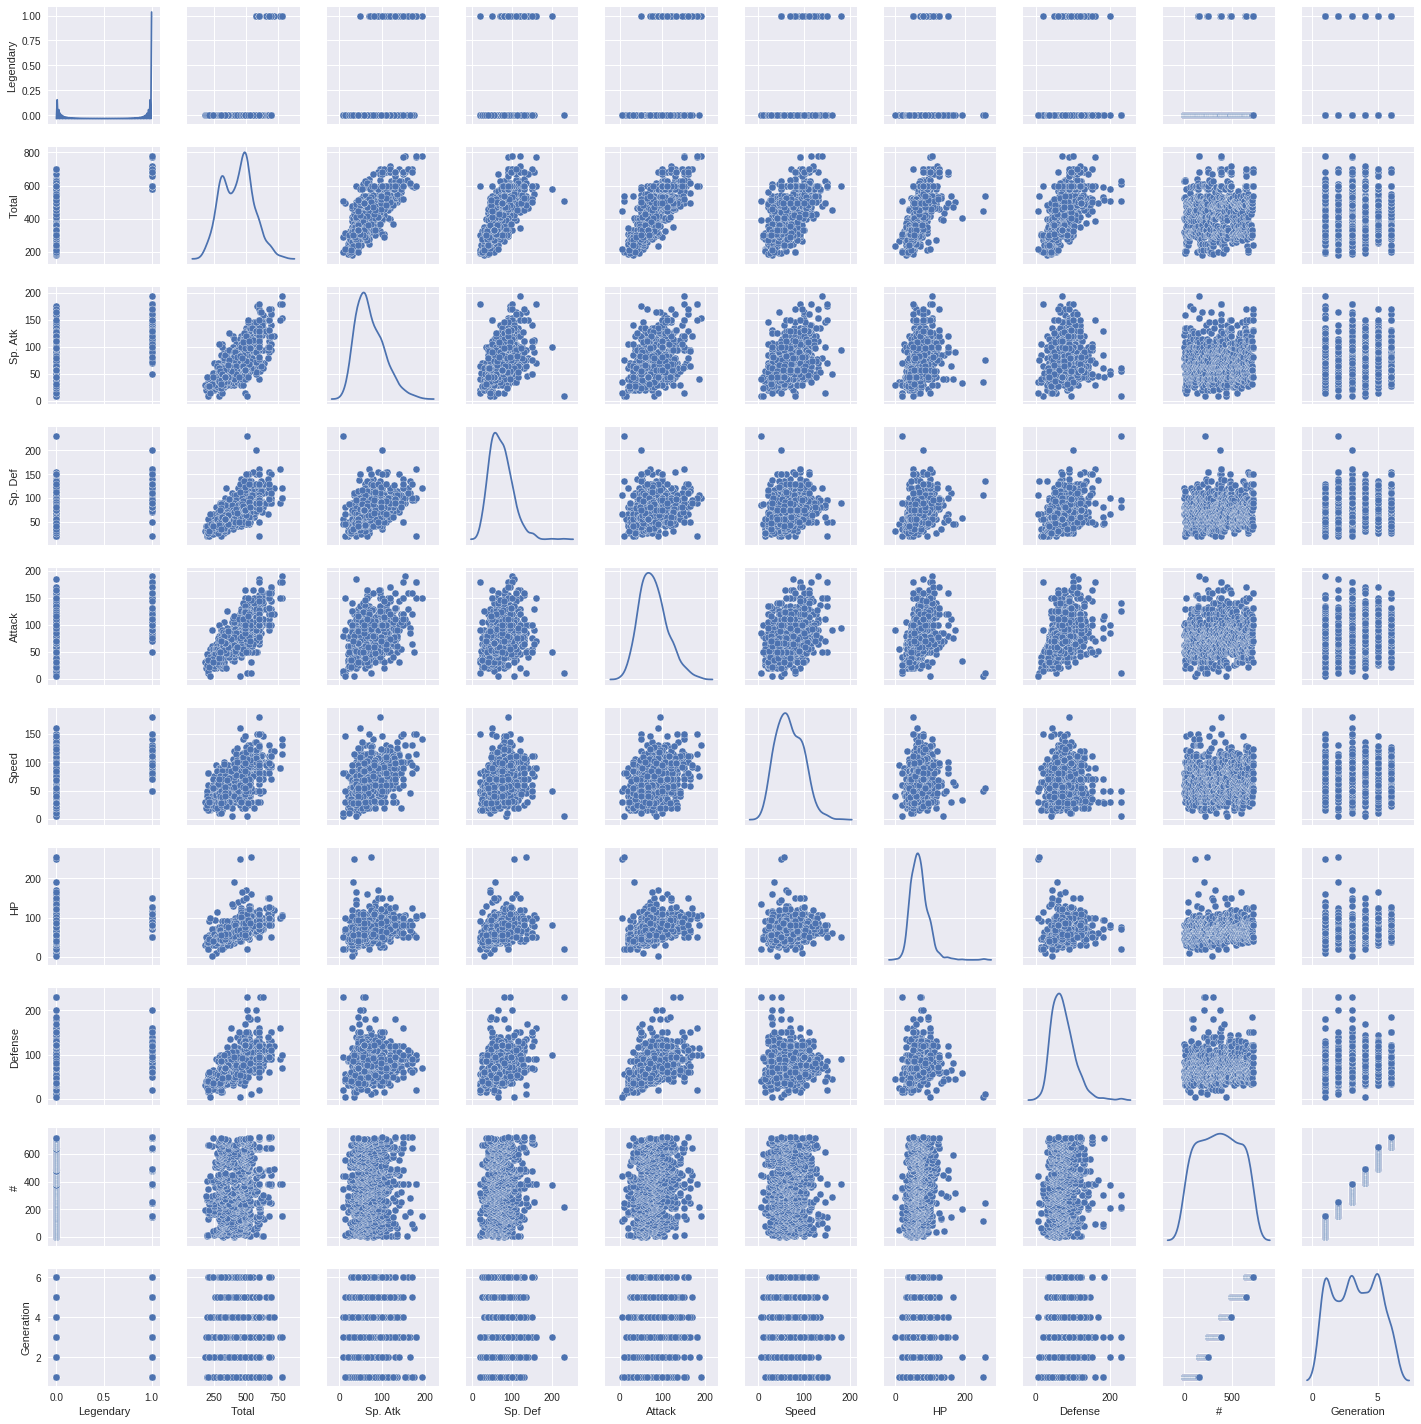

In [23]:
sns.set()
columns = ['Legendary', 'Total', 'Sp. Atk', 'Sp. Def', 'Attack', 'Speed', 'HP',
       'Defense', '#', 'Generation']
sns.pairplot(pkmn_data[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

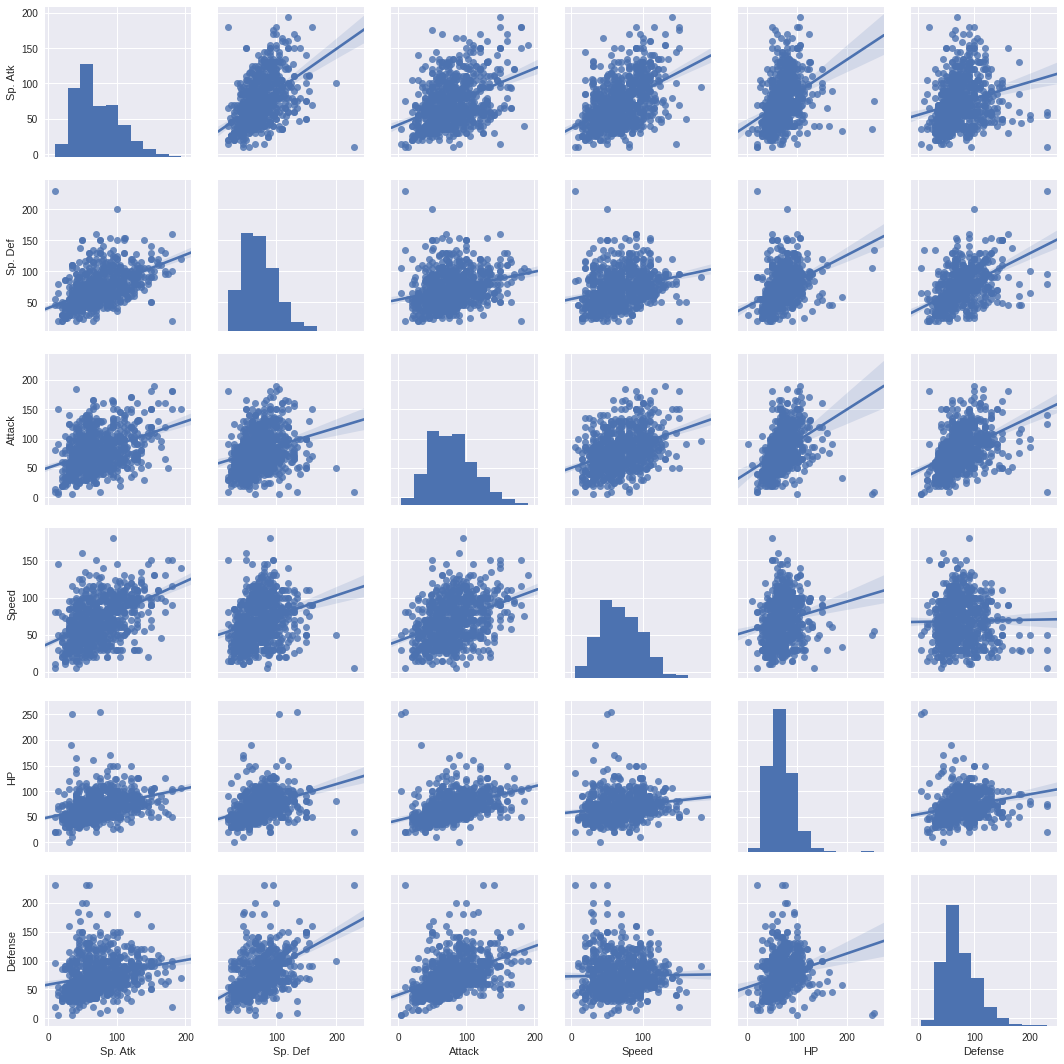

In [24]:
columns = ['Sp. Atk', 'Sp. Def', 'Attack', 'Speed', 'HP',
       'Defense']
sns.pairplot(data=pkmn_data[columns], kind='reg')

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


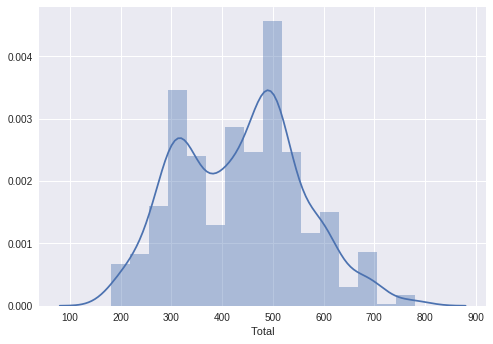

In [25]:
sns.distplot(pkmn_data['Total'])

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


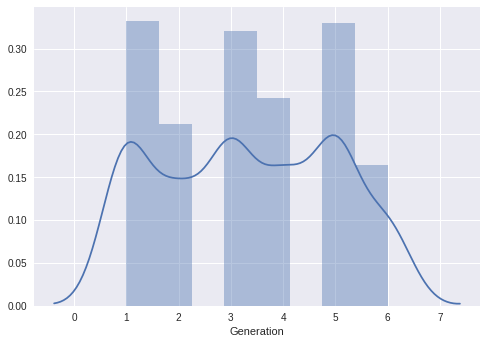

In [26]:
sns.distplot(pkmn_data['Generation'])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


(-0.5, 1.5, -6.25, 241.25)

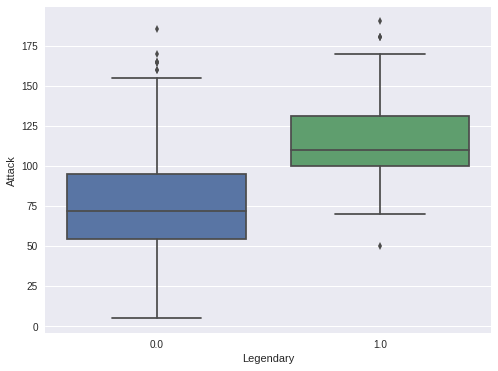

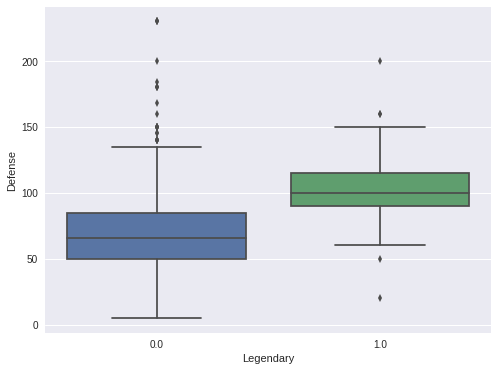

In [28]:
var = 'Legendary'
data = pd.concat([pkmn_data['Attack'], pkmn_data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Legendary', y="Attack", data=data)
fig.axis()
data = pd.concat([pkmn_data['Defense'], pkmn_data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Legendary', y="Defense", data=data)
fig.axis()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


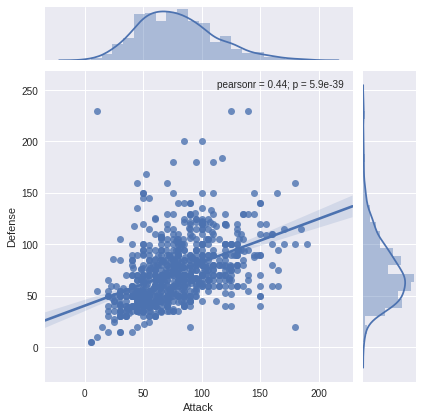

In [29]:
sns.jointplot(pkmn_data['Attack'], pkmn_data['Defense'], kind='reg')